In [1]:
import tensorflow as tf
import rasterio
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
image_prefix = "./images/LE70332482010173EDC00/LE70332482010173EDC00"
band_postfix = ['_B1_clipped.TIF', '_B2_clipped.TIF', '_B3_clipped.TIF', '_B4_clipped.TIF',
                '_B5_clipped.TIF', '_B6_VCID_2_clipped.TIF', '_B7_clipped.TIF']
rows = 5400
cols = 3200
feature_set = np.ones((rows * cols, 9))
num_categories = 3

In [3]:
for index, value in enumerate(band_postfix):
    image_path = image_prefix + value
    with rasterio.open(image_path) as dataset:
            bounds = dataset.bounds
            band = dataset.read(1)
            feature_set[:, index + 2] = np.reshape(band, rows*cols)

x = np.linspace(bounds.top, bounds.bottom, rows)
y = np.linspace(bounds.left, bounds.right, cols)
xv, yv = np.meshgrid(x, y)
feature_set[:, 0] = np.reshape(xv, rows*cols)
feature_set[:, 1] = np.reshape(yv, rows*cols)

# Normalize feature values
feature_set_shift = feature_set - feature_set.min(axis=0)
feature_set_norm = feature_set_shift / feature_set_shift.max(axis=0)

In [4]:
x = tf.placeholder(tf.float32, [None, feature_set_norm.shape[1]])
W = tf.Variable(tf.zeros([feature_set_norm.shape[1], num_categories]))
b = tf.Variable(tf.zeros([num_categories]))
y = tf.nn.softmax(tf.matmul(x, W) + b)

saver = tf.train.Saver()
prediction = tf.argmax(y,1)
with tf.Session() as sess:
    saver.restore(sess, "model.ckpt")
    categories = sess.run(prediction, feed_dict={x: feature_set_norm})

    

In [5]:
labeled_image = np.reshape(categories, (rows, cols))

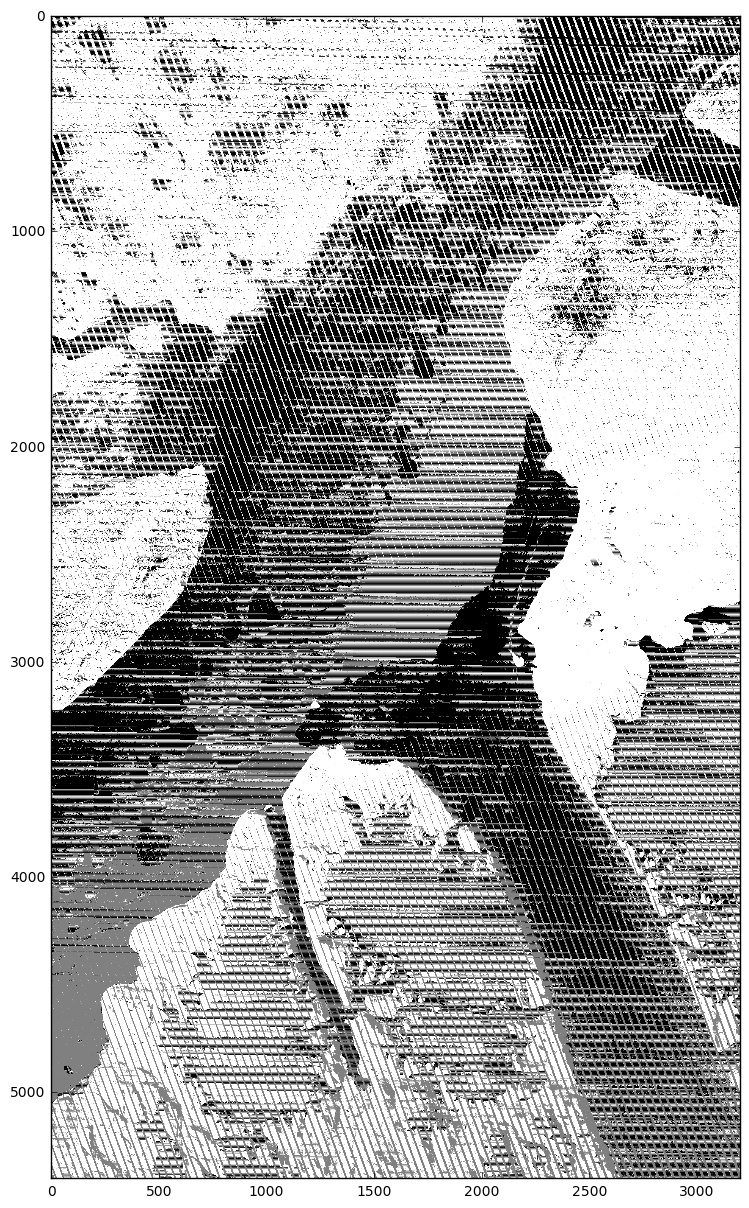

In [6]:
fig = plt.figure(figsize = (15,15))
plt.imshow(labeled_image, cmap='gray')